# Regression Project - House Sales in King County, USA
Author : Sean Chien

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv('kc_house_data.csv')
print(data.columns)
data.head(5)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Quick Overview of the variables

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


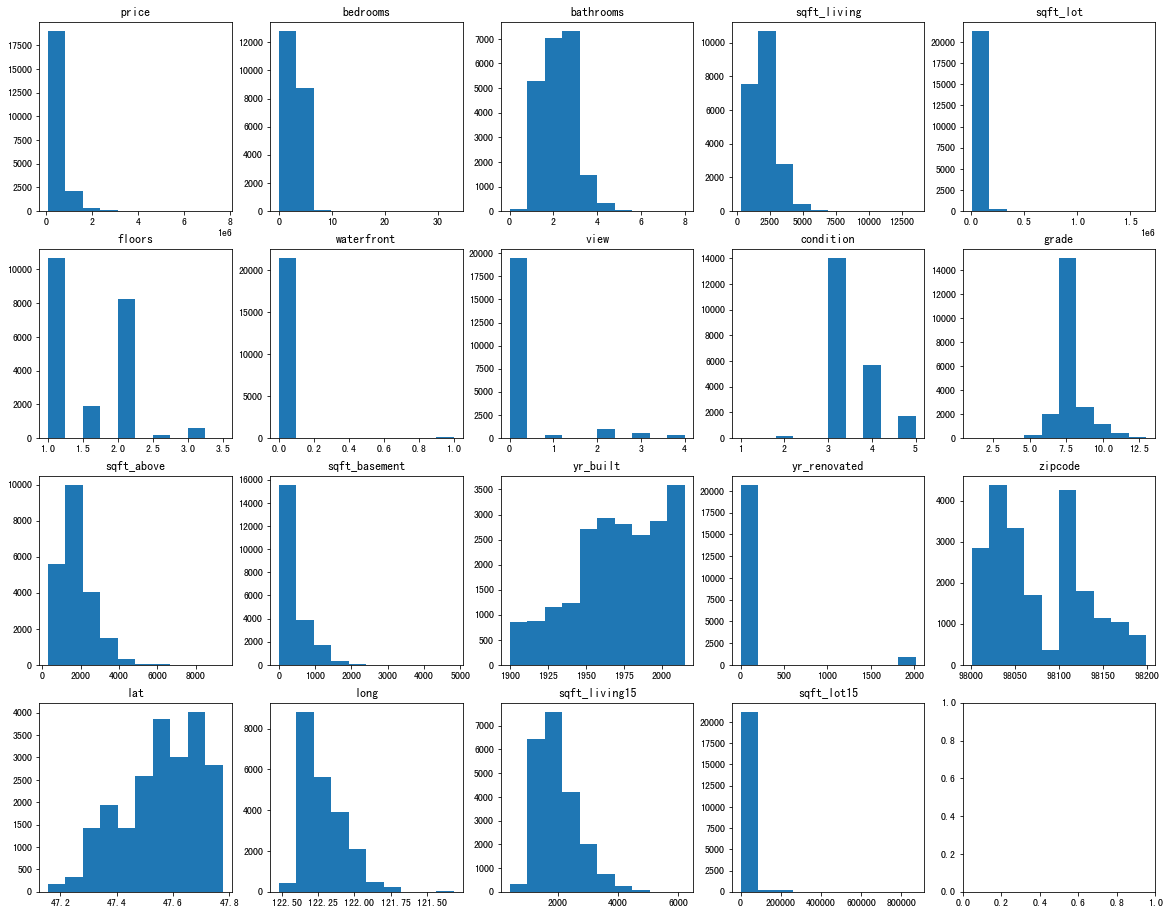

In [4]:
plt.rcParams["figure.figsize"] = (20,16)
fig, axs = plt.subplots(4, 5)
check = data.columns[2:]
i = 0
for p in range(4):
    for q in range(5):
        try:

            axs[p][q].hist(data[check[i]])
            axs[p][q].set_title(check[i])
            
            i+=1
        except:
            pass

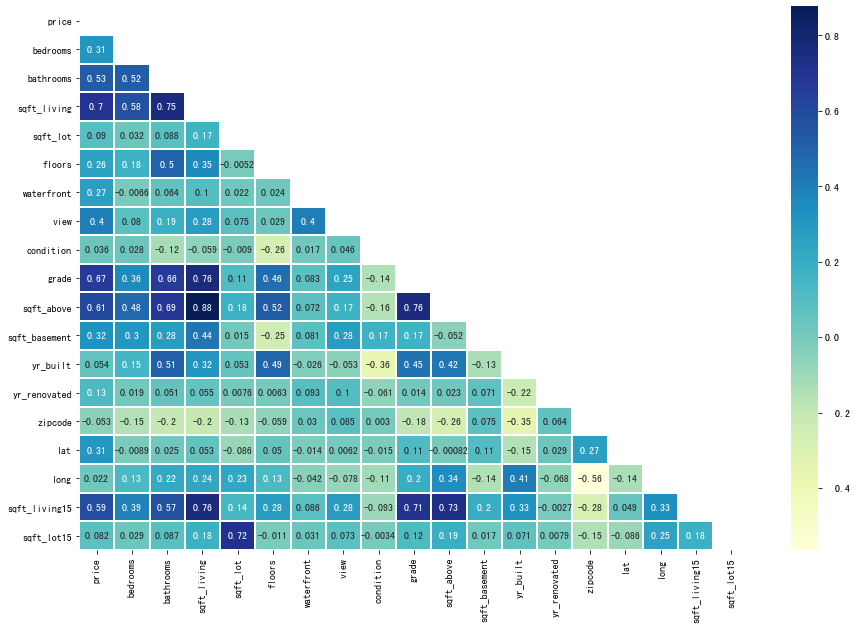

In [5]:
data_cor = data.drop(['id','date'],axis = 1)
mask = np.triu(data_cor.corr())
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(data_cor.corr(), annot=True, linewidth = 1, mask = mask, cmap="YlGnBu")

In [6]:
table = pd.DataFrame(columns=['Model Name','Description','Training R^2','Testing R^2','Training RMSE','Testing RMSE'])

# Simple Linear Regression

First of all, run 3 Simple Linear Regression with differenct correlations.
As we can see as the table below, the performance is not good. 

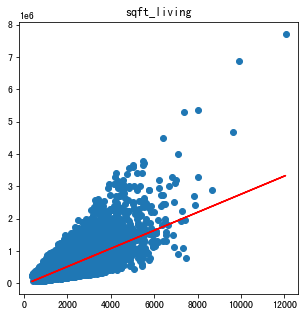

Intercept = -40442.16993730806
Slope = [280.0872224]


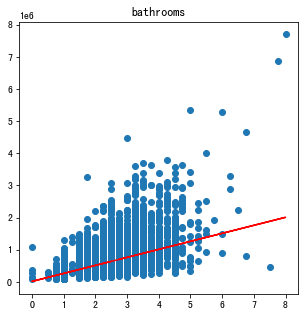

Intercept = 13513.137976579019
Slope = [249375.03133804]


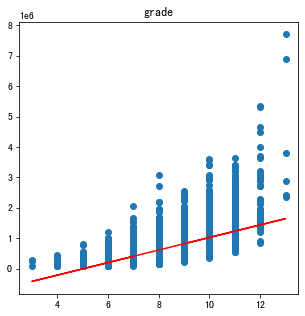

Intercept = -1039654.3257277964
Slope = [206463.11391344]


,Model Name,Description,Training R^2,Testing R^2,Training RMSE,Testing RMSE
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",sqft_living,0.4917225687188175,0.4952354313633296,259827.905729185,265193.20423282945
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",bathrooms,0.2769972112338792,0.2729690001674684,309888.4329417694,318269.0619152901
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",grade,0.4456105025230409,0.4449593951794849,271358.1543661293,278086.7761610393


In [7]:
feature_list = ['sqft_living','bathrooms','grade']
for i in feature_list:
    X = data[[i]]
    y = data.price
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_train)
    plt.rcParams["figure.figsize"] = (5,5)
    plt.scatter(X_train,y_train)
    plt.plot(X_train,y_pred, c = 'red')
    plt.title(f'{i}')
    plt.show()

    train_rsquared = lr.score(X_train,y_train)
    test_rsquared = lr.score(X_test,y_test)
    train_rmse = mean_squared_error(y_train, lr.predict(X_train), squared = False) 
    test_rmse = mean_squared_error(y_test, lr.predict(X_test), squared = False) 

    print(f'Intercept = {lr.intercept_}')
    print(f'Slope = {lr.coef_}')


    df = {'Model Name':lr,'Description':f'{X.columns[0]}','Training R^2':f'{train_rsquared}',
        'Testing R^2':f'{test_rsquared}','Training RMSE':f'{train_rmse}','Testing RMSE':f'{test_rmse}'}
    table = table.append(df, ignore_index = True)
table

# Multiple Linear Regression

Then run 2 multiple Linear Regression, and evaluate the performance.

Obvious, models are better than previous one, higher R Squared and lower RMSE.

In [8]:
X = data[['sqft_living','bathrooms','grade','sqft_above']]
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

lr = LinearRegression()
lr.fit(X_train,y_train)

train_rsquared = lr.score(X_train,y_train)
test_rsquared = lr.score(X_test,y_test)
train_rmse = mean_squared_error(y_train, lr.predict(X_train), squared = False) 
test_rmse = mean_squared_error(y_test, lr.predict(X_test), squared = False) 

print(f'Intercept = {lr.intercept_}')
print(f'Slope = {lr.coef_}')


df = {'Model Name':lr,'Description':f'{[i for i in X.columns]}','Training R^2':f'{train_rsquared}',
    'Testing R^2':f'{test_rsquared}','Training RMSE':f'{train_rmse}','Testing RMSE':f'{test_rmse}'}
table = table.append(df, ignore_index = True)

Intercept = -647454.8472492807
Slope = [ 2.56670387e+02 -3.45036919e+04  1.15292166e+05 -8.62749926e+01]


In [9]:
X = data.drop(['price','date','id'],axis = 1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
train_rsquared = lr.score(X_train,y_train)
test_rsquared = lr.score(X_test,y_test)
train_rmse = mean_squared_error(y_train, lr.predict(X_train), squared = False) 
test_rmse = mean_squared_error(y_test, lr.predict(X_test), squared = False) 

print(f'Intercept = {lr.intercept_}')
print(f'Slope = {lr.coef_}')

df = {'Model Name':lr,'Description':f'All features without price, date, id','Training R^2':f'{train_rsquared}',
    'Testing R^2':f'{test_rsquared}','Training RMSE':f'{train_rmse}','Testing RMSE':f'{test_rmse}'}
table = table.append(df, ignore_index = True)
table

Intercept = 6985043.452900806
Slope = [-3.37507990e+04  4.07973430e+04  1.09466394e+02  1.03079153e-01
  1.06079939e+04  5.17232748e+05  5.33812795e+04  2.85288932e+04
  9.56993668e+04  6.69537128e+01  4.25126812e+01 -2.58513278e+03
  2.27335141e+01 -5.84020834e+02  6.10009320e+05 -2.10119461e+05
  2.32489896e+01 -3.59778513e-01]


,Model Name,Description,Training R^2,Testing R^2,Training RMSE,Testing RMSE
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",sqft_living,0.4917225687188175,0.4952354313633296,259827.905729185,265193.20423282945
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",bathrooms,0.2769972112338792,0.2729690001674684,309888.4329417694,318269.0619152901
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",grade,0.4456105025230409,0.4449593951794849,271358.1543661293,278086.7761610393
3,"LinearRegression(copy_X=True, fit_intercept=Tr...","['sqft_living', 'bathrooms', 'grade', 'sqft_ab...",0.5444131706531237,0.5411061641330441,245991.98661735386,252856.47049344136
4,"LinearRegression(copy_X=True, fit_intercept=Tr...","All features without price, date, id",0.6960237336878192,0.7069046794131755,200934.82721934537,202079.56665275805


# Polynomial Regression

In previous models, the relationship between Xs and y are linear.
However, the true relationship might not be so.
Thus, I used Polynomial Regression, and let's look at the result.

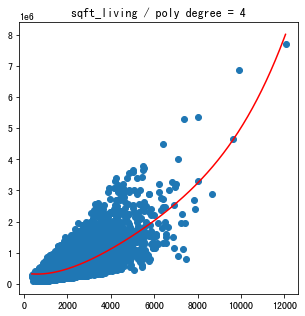

Intercept = 6985043.452900806
Slope = [-3.37507990e+04  4.07973430e+04  1.09466394e+02  1.03079153e-01
  1.06079939e+04  5.17232748e+05  5.33812795e+04  2.85288932e+04
  9.56993668e+04  6.69537128e+01  4.25126812e+01 -2.58513278e+03
  2.27335141e+01 -5.84020834e+02  6.10009320e+05 -2.10119461e+05
  2.32489896e+01 -3.59778513e-01]


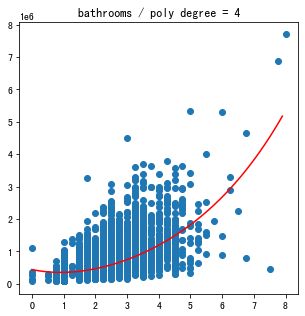

Intercept = 6985043.452900806
Slope = [-3.37507990e+04  4.07973430e+04  1.09466394e+02  1.03079153e-01
  1.06079939e+04  5.17232748e+05  5.33812795e+04  2.85288932e+04
  9.56993668e+04  6.69537128e+01  4.25126812e+01 -2.58513278e+03
  2.27335141e+01 -5.84020834e+02  6.10009320e+05 -2.10119461e+05
  2.32489896e+01 -3.59778513e-01]


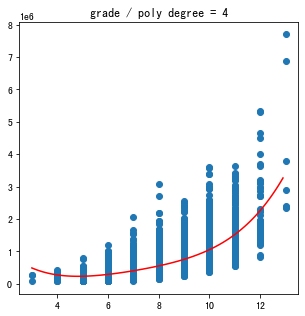

Intercept = 6985043.452900806
Slope = [-3.37507990e+04  4.07973430e+04  1.09466394e+02  1.03079153e-01
  1.06079939e+04  5.17232748e+05  5.33812795e+04  2.85288932e+04
  9.56993668e+04  6.69537128e+01  4.25126812e+01 -2.58513278e+03
  2.27335141e+01 -5.84020834e+02  6.10009320e+05 -2.10119461e+05
  2.32489896e+01 -3.59778513e-01]


In [10]:
feature_list = ['sqft_living','bathrooms','grade']
for i in feature_list:
    X = data[[i]]
    y = data.price
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
    degree = 4
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X_train)

    poly = LinearRegression()
    poly.fit(X_poly, y_train)

    plt.rcParams["figure.figsize"] = (5,5)
    X_grid = np.arange(min(X_train.values),max(X_train.values),.1)
    X_grid = X_grid.reshape(len(X_grid),1) 
    plt.scatter(X_train,y_train)
    plt.plot(X_grid, poly.predict(poly_reg.fit_transform(X_grid)), c = 'red')
    plt.title(f'{i} / poly degree = {degree}')
    plt.show()

    train_rsquared = poly.score(X_poly,y_train)
    test_rsquared = poly.score(poly_reg.fit_transform(X_test),y_test)
    train_rmse = mean_squared_error(y_train, poly.predict(poly_reg.fit_transform(X_train)), squared = False) 
    test_rmse = mean_squared_error(y_test, poly.predict(poly_reg.fit_transform(X_test)), squared = False) 

    print(f'Intercept = {lr.intercept_}')
    print(f'Slope = {lr.coef_}')


    df = {'Model Name':poly,'Description':f'{X.columns[0]} / Poly degree = {degree}','Training R^2':f'{train_rsquared}',
        'Testing R^2':f'{test_rsquared}','Training RMSE':f'{train_rmse}','Testing RMSE':f'{test_rmse}'}
    table = table.append(df, ignore_index = True)

# Multiple Polynomial Regression

In [11]:
X = data[['sqft_living','bathrooms','grade','sqft_above']]
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)


degree = 4
poly_reg = PolynomialFeatures(degree = degree)
X_poly = poly_reg.fit_transform(X_train)

poly = LinearRegression()
poly.fit(X_poly, y_train)

train_rsquared = poly.score(X_poly,y_train)
test_rsquared = poly.score(poly_reg.fit_transform(X_test),y_test)
train_rmse = mean_squared_error(y_train, poly.predict(poly_reg.fit_transform(X_train)), squared = False) 
test_rmse = mean_squared_error(y_test, poly.predict(poly_reg.fit_transform(X_test)), squared = False) 
print(f'Intercept = {lr.intercept_}')
print(f'Slope = {lr.coef_}')


df = {'Model Name':poly,'Description':f'{[i for i in X.columns]} / Poly degree = {degree}','Training R^2':f'{train_rsquared}',
    'Testing R^2':f'{test_rsquared}','Training RMSE':f'{train_rmse}','Testing RMSE':f'{test_rmse}'}
table = table.append(df, ignore_index = True)

Intercept = 6985043.452900806
Slope = [-3.37507990e+04  4.07973430e+04  1.09466394e+02  1.03079153e-01
  1.06079939e+04  5.17232748e+05  5.33812795e+04  2.85288932e+04
  9.56993668e+04  6.69537128e+01  4.25126812e+01 -2.58513278e+03
  2.27335141e+01 -5.84020834e+02  6.10009320e+05 -2.10119461e+05
  2.32489896e+01 -3.59778513e-01]


In [12]:
X = data.drop(['price','date','id'],axis = 1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)


degree = 2
poly_reg = PolynomialFeatures(degree = degree)
X_poly = poly_reg.fit_transform(X_train)

poly = LinearRegression()
poly.fit(X_poly, y_train)

train_rsquared = poly.score(X_poly,y_train)
test_rsquared = poly.score(poly_reg.fit_transform(X_test),y_test)
train_rmse = mean_squared_error(y_train, poly.predict(poly_reg.fit_transform(X_train)), squared = False) 
test_rmse = mean_squared_error(y_test, poly.predict(poly_reg.fit_transform(X_test)), squared = False) 
print(f'Intercept = {lr.intercept_}')
print(f'Slope = {lr.coef_}')


df = {'Model Name':poly,'Description':f'All features without price, date, id / Poly degree = {degree}','Training R^2':f'{train_rsquared}',
    'Testing R^2':f'{test_rsquared}','Training RMSE':f'{train_rmse}','Testing RMSE':f'{test_rmse}'}
table = table.append(df, ignore_index = True)

Intercept = 6985043.452900806
Slope = [-3.37507990e+04  4.07973430e+04  1.09466394e+02  1.03079153e-01
  1.06079939e+04  5.17232748e+05  5.33812795e+04  2.85288932e+04
  9.56993668e+04  6.69537128e+01  4.25126812e+01 -2.58513278e+03
  2.27335141e+01 -5.84020834e+02  6.10009320e+05 -2.10119461e+05
  2.32489896e+01 -3.59778513e-01]


As results in the table, I can come up with the best model for now is 

Polynoimail Regression (degree = 2) with all features without price, date, and id.

In [22]:
table['Training R^2'] = table['Training R^2'].astype('Float64')
table['Testing R^2'] = table['Testing R^2'].astype('Float64')
table['Training RMSE'] = table['Training RMSE'].astype('Float64')
table['Testing RMSE'] = table['Testing RMSE'].astype('Float64')
table.round(4)
print('Max Value = Green / Min Value = Orange')
table = table.style.highlight_max(axis = 0, color = 'green').highlight_min(axis = 0, color = 'orange')
table

Max Value = Green / Min Value = Orange


,Model Name,Description,Training R^2,Testing R^2,Training RMSE,Testing RMSE
0,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",sqft_living,0.491723,0.495235,259827.905729,265193.204233
1,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",bathrooms,0.276997,0.272969,309888.432942,318269.061915
2,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",grade,0.445611,0.444959,271358.154366,278086.776161
3,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)","['sqft_living', 'bathrooms', 'grade', 'sqft_above']",0.544413,0.541106,245991.986617,252856.470493
4,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)","All features without price, date, id",0.696024,0.706905,200934.827219,202079.566653
5,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",sqft_living / Poly degree = 4,0.541215,0.468608,246853.990714,272097.993374
6,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",bathrooms / Poly degree = 4,0.338721,0.329010,296365.543162,305756.626329
7,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",grade / Poly degree = 4,0.515060,0.521779,253792.917324,258126.347429
8,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)","['sqft_living', 'bathrooms', 'grade', 'sqft_above'] / Poly degree = 4",0.632245,0.522352,221011.306747,257971.510562
9,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)","All features without price, date, id / Poly degree = 2",0.825111,0.830245,152410.990487,153790.396814


In [14]:
table2 = pd.DataFrame(columns=['Model Name','Description','Training R^2','Testing R^2','Training RMSE','Testing RMSE'])
#table2 = table2.append(table.iloc[9],)
table2 = table2.append(table.iloc[4],)

Also, I can compare the models of Lasso Regression and Ridge Regression.

However, all of them are not as good as Multiple Linear Regression with all features without price, date, id

# Lasso Regression

In [15]:
X = data.drop(['price','date','id'],axis = 1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)



scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
y_train = y_train - np.mean(y_train)

X_test = scaler.transform(X_test)
y_test = y_test - np.mean(y_train)


l2_penalties = np.logspace(-5, 5, 11)

for l2_penalty in l2_penalties: 
    las = Lasso(alpha = l2_penalty, random_state = 2)
    las.fit(X_train,y_train)

    train_rsquared = las.score(X_train,y_train)
    test_rsquared = las.score(X_test,y_test)
    train_rmse = mean_squared_error(y_train, las.predict(X_train), squared = False) 
    test_rmse = mean_squared_error(y_test, las.predict(X_test), squared = False) 
    


    df = {'Model Name':las,'Description':'All feature without price, date, id ','Training R^2':f'{train_rsquared}',
    'Testing R^2':f'{test_rsquared}','Training RMSE':f'{train_rmse}','Testing RMSE':f'{test_rmse}'}
    table2 = table2.append(df, ignore_index = True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18728517041584.188, tolerance: 200946747939.71344
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18728700171445.812, tolerance: 200946747939.71344
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18728720049059.062, tolerance: 200946747939.71344
  model = cd_fast.enet_coordinate_descent

# Ridge Regression

In [16]:


l2_penalties = np.logspace(-5, 5, 11)

for l2_penalty in l2_penalties: 
    rid = Ridge(alpha = l2_penalty, random_state = 2)
    rid.fit(X_train,y_train)

    train_rsquared = rid.score(X_train,y_train)
    test_rsquared = rid.score(X_test,y_test)
    train_rmse = mean_squared_error(y_train, rid.predict(X_train), squared = False) 
    test_rmse = mean_squared_error(y_test, rid.predict(X_test), squared = False) 
    


    df = {'Model Name':rid,'Description':'All feature without price, date, id ','Training R^2':f'{train_rsquared}',
    'Testing R^2':f'{test_rsquared}','Training RMSE':f'{train_rmse}','Testing RMSE':f'{test_rmse}'}
    table2 = table2.append(df, ignore_index = True)

In [17]:
table2['Training R^2'] = table2['Training R^2'].astype('Float64')
table2['Testing R^2'] = table2['Testing R^2'].astype('Float64')
table2['Training RMSE'] = table2['Training RMSE'].astype('Float64')
table2['Testing RMSE'] = table2['Testing RMSE'].astype('Float64')
table2.round(4)
print('Max Value = Purple / Min Value = Orange')
table2 = table2.style.highlight_max(axis = 0, color = 'green').highlight_min(axis = 0, color = 'orange')
table2 

Max Value = Purple / Min Value = Orange


,Model Name,Description,Training R^2,Testing R^2,Training RMSE,Testing RMSE
0,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)","All features without price, date, id",0.696024,0.706905,200934.827219,202079.566653
1,"Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, selection='cyclic', tol=0.0001, warm_start=False)","All feature without price, date, id",0.696024,-1.359594,200934.827219,573372.214718
2,"Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, selection='cyclic', tol=0.0001, warm_start=False)","All feature without price, date, id",0.696024,-1.359594,200934.827219,573372.214709
3,"Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, selection='cyclic', tol=0.0001, warm_start=False)","All feature without price, date, id",0.696024,-1.359594,200934.827219,573372.214616
4,"Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, selection='cyclic', tol=0.0001, warm_start=False)","All feature without price, date, id",0.696024,-1.359594,200934.827219,573372.213687
5,"Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, selection='cyclic', tol=0.0001, warm_start=False)","All feature without price, date, id",0.696024,-1.359594,200934.827220,573372.204400
6,"Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, selection='cyclic', tol=0.0001, warm_start=False)","All feature without price, date, id",0.696024,-1.359594,200934.827324,573372.111558
7,"Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, selection='cyclic', tol=0.0001, warm_start=False)","All feature without price, date, id",0.696024,-1.359586,200934.837681,573371.186495
8,"Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, selection='cyclic', tol=0.0001, warm_start=False)","All feature without price, date, id",0.696022,-1.359637,200935.436993,573377.362223
9,"Lasso(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, selection='cyclic', tol=0.0001, warm_start=False)","All feature without price, date, id",0.695840,-1.360182,200995.701136,573443.612875


Finally, SVR can help us come up with non-linear models.

As we can see, the SVR models we create have higher RMSE that means the performance is worsers than the Polynomial Model.

# SVR

In [18]:
X = data.drop(['price','date','id'],axis = 1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)


svr_linear = SVR(kernel='poly', epsilon = 0.2)
svr_linear.fit(X_train, y_train)

y_pred = svr_linear.predict(X_train)

print(f'Intercept = {svr_linear.intercept_}')
#print(f'Slope = {svr_linear.coef_}')
print(f'Training R^2 = {svr_linear.score(X_train,y_train)}')
print(f'Testing R^2 = {svr_linear.score(X_test,y_test)}')
print(f'Training RMSE = {mean_squared_error(y_train, y_pred, squared = False)}')
print(f'Testing RMSE = {mean_squared_error(y_test, svr_linear.predict(X_test), squared = False)}')


Intercept = [449940.99954351]
Training R^2 = -0.05971528653406533
Testing R^2 = -0.056548309633431826
Training RMSE = 375171.6205174764
Testing RMSE = 383674.238019025


In [19]:
X = data.drop(['price','date','id'],axis = 1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)


svr_linear = SVR(kernel='rbf', epsilon = 0.2)
svr_linear.fit(X_train, y_train)

y_pred = svr_linear.predict(X_train)

print(f'Intercept = {svr_linear.intercept_}')
#print(f'Slope = {svr_linear.coef_}')
print(f'Training R^2 = {svr_linear.score(X_train,y_train)}')
print(f'Testing R^2 = {svr_linear.score(X_test,y_test)}')
print(f'Training RMSE = {mean_squared_error(y_train, y_pred, squared = False)}')
print(f'Testing RMSE = {mean_squared_error(y_test, svr_linear.predict(X_test), squared = False)}')

Intercept = [450215.00285091]
Training R^2 = -0.062376820326028426
Testing R^2 = -0.055127707058459485
Training RMSE = 375642.45724950364
Testing RMSE = 383416.2129279281


In [20]:
X = data.drop(['price','date','id'],axis = 1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)


svr_linear = SVR(kernel='sigmoid', epsilon = 0.2)
svr_linear.fit(X_train, y_train)

y_pred = svr_linear.predict(X_train)

print(f'Intercept = {svr_linear.intercept_}')
#print(f'Slope = {svr_linear.coef_}')
print(f'Training R^2 = {svr_linear.score(X_train,y_train)}')
print(f'Testing R^2 = {svr_linear.score(X_test,y_test)}')
print(f'Training RMSE = {mean_squared_error(y_train, y_pred, squared = False)}')
print(f'Testing RMSE = {mean_squared_error(y_test, svr_linear.predict(X_test), squared = False)}')

Intercept = [449987.49285489]
Training R^2 = -0.062443673485747864
Testing R^2 = -0.05519552349650625
Training RMSE = 375654.2762621404
Testing RMSE = 383428.53442412376


Meanwhile, we can take a look at the Regression Tree, but the performance is bad.

Thus, I'll get rid of this model.

# Regression Tree

Training R^2 = 0.6820123856394956
Testing R^2 = 0.6248360274291056
Training RMSE = 205513.55976506078
Testing RMSE = 228627.52896699906


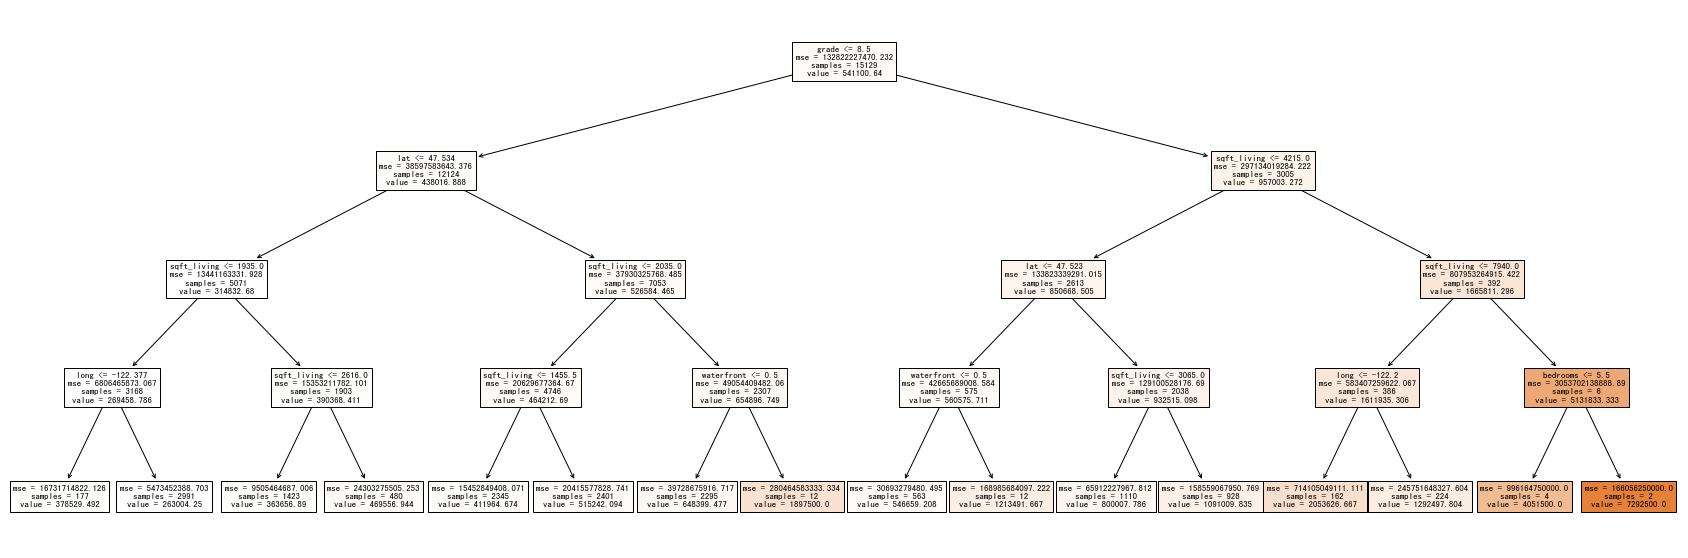

In [21]:
X = data.drop(['price','date','id'],axis = 1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

rt = DecisionTreeRegressor(max_depth = 4)
rt.fit(X_train,y_train)
y_pred = rt.predict(X_train)
#text_representation = export_text(rt)
#print(text_representation)
fig = plt.figure(figsize=(30,10))
_ = plot_tree(rt, filled=True, feature_names= X.columns)

print(f'Training R^2 = {rt.score(X_train,y_train)}')
print(f'Testing R^2 = {rt.score(X_test,y_test)}')
print(f'Training RMSE = {mean_squared_error(y_train, y_pred, squared = False)}')
print(f'Testing RMSE = {mean_squared_error(y_test, rt.predict(X_test), squared = False)}')


To sum up, with creating more than 20 models, Polynoimail Regression (degree = 2) with all features without price, date, and id is the best model.

For sure, we should keep collecting data and do more experiment to improve the model, but for now this will be the model for prediction.